## Центральная предельная теорема своими руками

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

В качестве НСВ возьмем Лог-нормальное распределение.

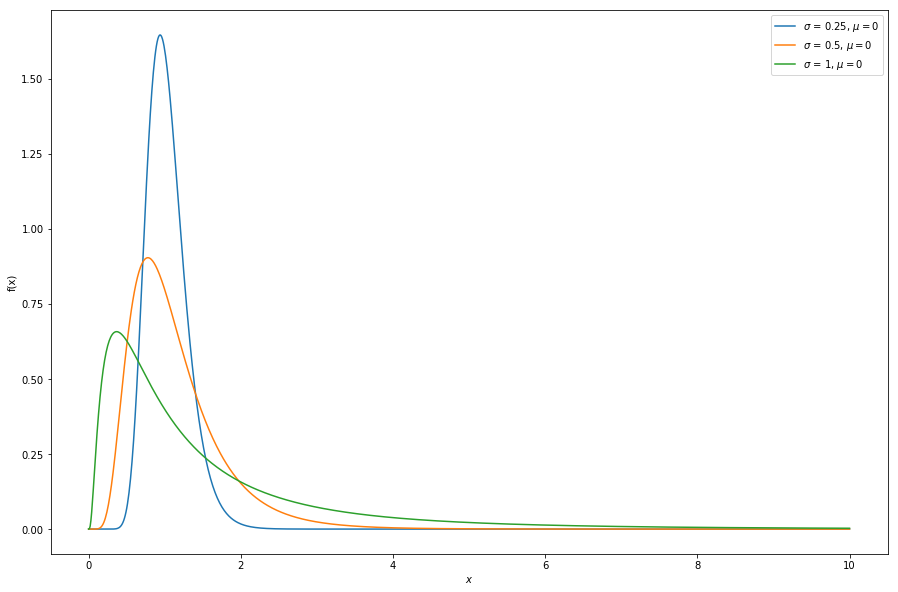

In [3]:
s = [0.25, 0.5, 1]

plt.figure(figsize=(15,10))
for i in s:
    lognorm_rv = sts.lognorm(i)
    x = np.linspace(0,10,1000)
    pdf = lognorm_rv.pdf(x)
    plt.plot(x, pdf, label='$\sigma$ = {0}, $\mu = 0$'.format(i))
plt.xlabel('$x$')
plt.ylabel('f(x)')
plt.legend()
plt.show()    


Сравним функцию распределения из Википедии (https://en.wikipedia.org/wiki/Log-normal_distribution) 
и из документации SciPy (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)

Википедия: $$ \frac{1}{x\sigma\sqrt{2\pi}}{e}^-\frac{(ln{x}-\mu)^2}{2\sigma^2}$$

SciPy: $$ 1 / (s*x*sqrt(2*pi)) * exp(-1/2*(log(x)/s)**2)$$

Из сравнения функций следует, что s = $\sigma$

Если $log(x)$ нормально распределена со средним значением mu и дисперсией $\sigma^2$, то $x$ лог-нормально распределена с параметром s (shape) равным sigma и параметром scale равным $exp(mu)$.
Зададим распределение явно:

In [4]:
mu = 0
sigma = 0.25

lognorm_rv = sts.lognorm(s = sigma, scale = np.exp(mu))

1. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра density=True, для старых версий matplotlib normed=True).

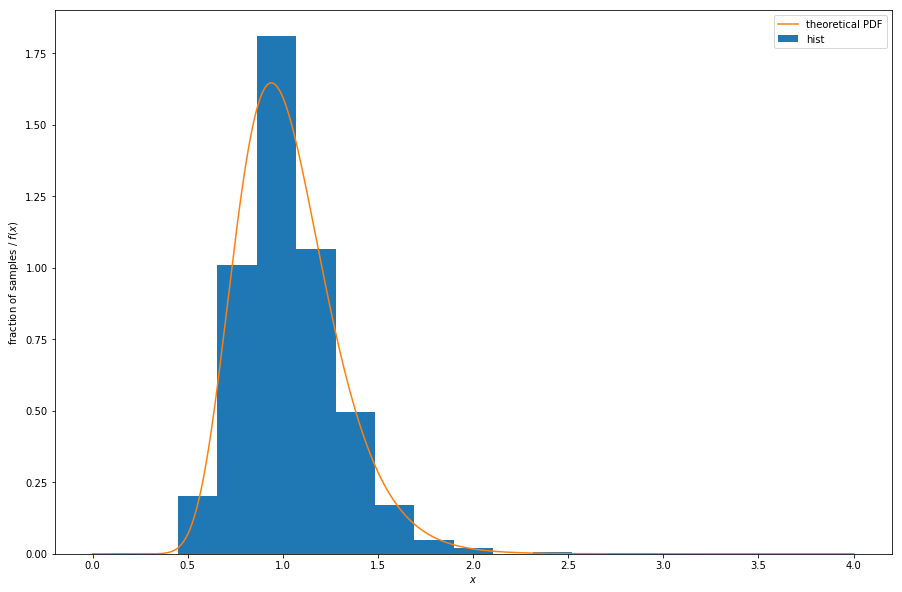

In [5]:
sample = lognorm_rv.rvs(size = 1000)

x = np.linspace(0, 4, 1000)
pdf = lognorm_rv.pdf(x)

plt.figure(figsize=(15, 10))
plt.hist(sample, density=True, label='hist')
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('fraction of samples / $f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.show()

2. Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Теоретическое матожидание, согласно данным из Википедии равно: $$E = \exp(\mu+\frac{\sigma^2}{2})$$
Дисперсия равна: $$D = [\exp(\sigma^2)-1]\exp(2\mu+\sigma^2)$$

In [6]:
E = np.exp(mu + (sigma**2)/2)
E

1.0317434074991028

In [7]:
var = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
var

0.06865399414896677

In [23]:
def f(E, var, n=100, l=0, r=2):
    lognorm_rv = sts.lognorm(s = sigma, scale = np.exp(mu))
    sample = lognorm_rv.rvs(size = (1000, n))
    means = sample.mean(axis=1)
    
    plt.figure(figsize=(15,10))
    plt.hist(means, density=True, label='hist')
    norm_rv = sts.norm(loc=E, scale=(var / n)**0.5)
    x = np.linspace(l, r, n)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Normal PDF')
    plt.ylabel('fraction of means / $f(x)$')
    plt.xlabel('$x$')
    plt.legend()
    plt.show()

Зададим $n=5$:

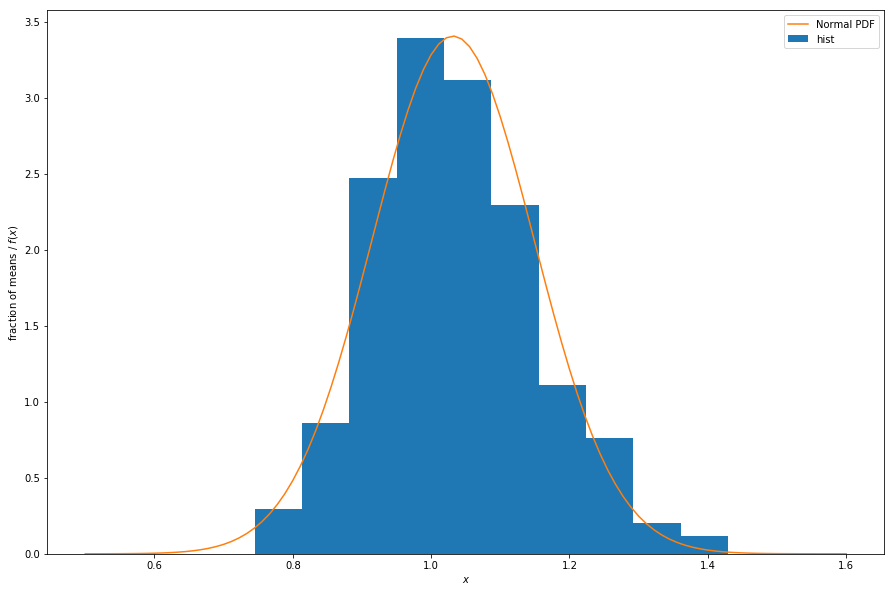

In [9]:
f(E, var, 5, 0.5, 1.6)

Зададим $n=10$:

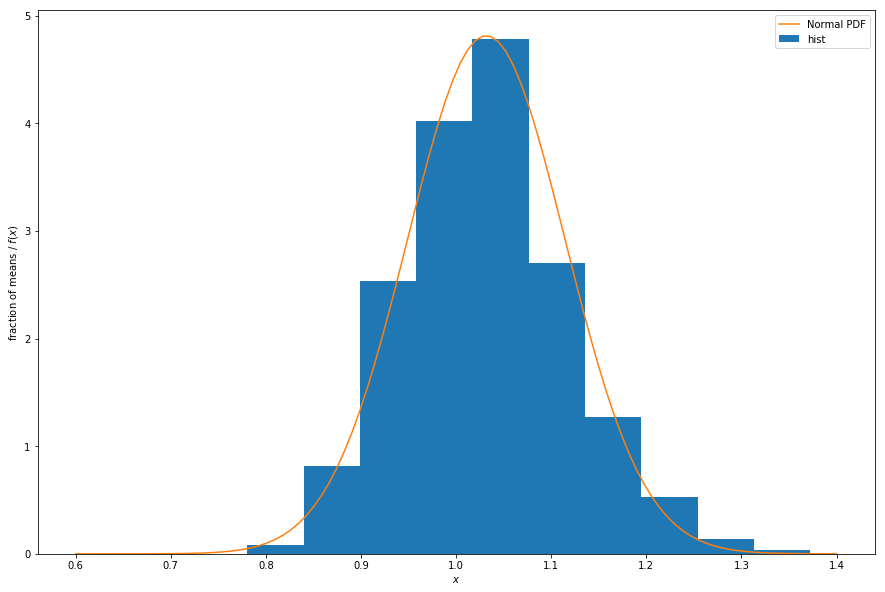

In [10]:
f(E, var, 10, 0.6, 1.4)

Зададим $n=50$:

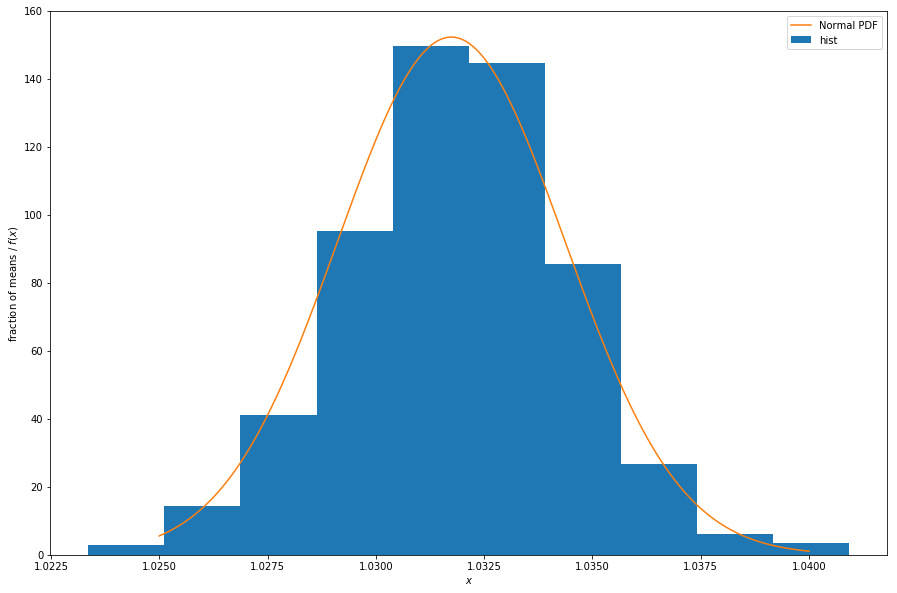

In [27]:
f(E, var, 10000, 1.025, 1.04)

3. Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Ответ: чем больше n - тем лучше распределение выборочных средних описывается нормальным распределением.